# Characteristic equation for the start up solution

In [1]:
import matplotlib.pyplot as plt
import math
import os
import numpy as np
from channel import channelFlows as cf
from matplotlib import rc

import os
figFolder = os.path.join(os.getcwd(), 'figures')
print("Saving figures in:\n" + figFolder)

saveFig=False
if saveFig:
    if not os.path.exists(figFolder):
        os.makedirs(figFolder)

Saving figures in:
/home/dirk/Nextcloud/repos/cpp/startSlip/python/notebooks/figures


## Select the slip length via a slider
Move the slider to selcect a value for the slip length. The characteristic function is updated automatically. For the value of $S_+ = S_- =: S = 1.25$ the root caused by the fraction term is nearly coinciding with the singularity caused by the $\tan$-term and is difficult to identify.

In [2]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def createPlot(S):
    L=S # setting R=1 and L=S gives the prescribed value for S
    R=1
    N=10
    tol = 1e-8
    eps = 1e-8
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_tight_layout(True)
    fig.set_size_inches(8, 4)

    ax1.set_xlabel('$k$')
    ax1.set_ylabel('$f(k)$')
    ax1.set_ylim([-20,20])
    ax1.set_xlim([-4,4])
    ax1.grid(b=None, which='major', axis='both')
    
    k = np.arange(-10,10,0.0001) 
    n = np.arange(-10,10,1)
    cosSingulars = np.pi*(2*n+1)/4.0
    fracSingulars = np.array([R/L,-R/L])
    singulars=np.concatenate((cosSingulars,fracSingulars))
    
    Phi=np.sort(np.concatenate((np.array([R/L]) , np.array(cosSingulars))))
    
    coeffs = cf.StartupCoefficients_scaled()
    Kn = coeffs.Kn(L/R, L/R, N, tol, eps)
    Kns = np.sort( np.concatenate( (-1.0 * Kn, np.array([0.0]), Kn ) ) )
    
    b = np.diff(coeffs._kFunc(k,L/R))
    mask = np.where(np.abs(b) >= 20)[0]+1
    
    kCondNoJump = np.ma.masked_equal(np.insert(coeffs._kFunc(k,L/R), mask, -1), -1)
    k = np.ma.masked_equal(np.insert(k, mask, -1), -1)
    for r in singulars: 
        ax1.axvline(x=r,ls='--', dashes=[10, 8],color='darkgray')
    ax1.plot(k, kCondNoJump, label='$f(k)$')
    ax1.plot(fracSingulars, np.zeros(len(fracSingulars)),ls='', color='darkgray',marker='v',label='sing. fraction')
    ax1.plot(cosSingulars, np.zeros(len(cosSingulars)), ls='',color='darkgray',marker='^',label='sing. cosine')
    ax1.plot(Kns, np.zeros(len(Kns)),ls='', color='black',marker='o',label='$k_n$')
    
    ax1.legend(loc='lower right',framealpha=1.0)
    
interact(createPlot, S=(0.0001,3.0,0.01));

interactive(children=(FloatSlider(value=1.4901, description='S', max=3.0, min=0.0001, step=0.01), Output()), _…

## Overview of the characteristic equation
This figure shows the general behavior of the characteristic equation of the start up solution with equal slip on both walls with S=1.

Done


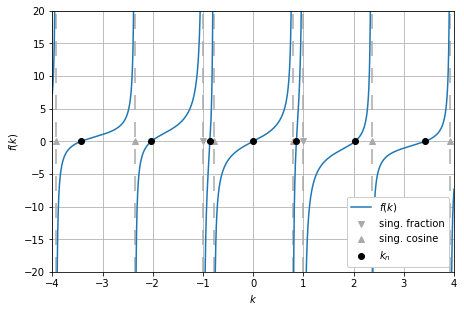

In [3]:
%matplotlib inline

S=1
L=S
R=1
N=10

figScale=1.2
defaultFigSize=plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [figScale*defaultFigSize[0], figScale*defaultFigSize[1]]

plt.xlabel('$k$')
plt.ylabel('$f(k)$')
plt.ylim([-20,20])
plt.xlim([-4,4])
plt.grid(b=None, which='major', axis='both')

k=np.arange(-10,10,0.0001) 
n=np.arange(-10,10,1)
cosSingulars=np.pi*(2*n+1)/4.0
fracSingulars=np.array([R/L,-R/L])
singulars=np.concatenate((cosSingulars,fracSingulars))

Phi=np.sort(np.concatenate((np.array([R/L]) , np.array(cosSingulars))))

coeffs = cf.StartupCoefficients_scaled()
tol = 1e-8
eps = 1e-8
Kn = coeffs.Kn(L/R, L/R, N, tol, eps)
Kns = np.sort( np.concatenate( (-1.0 * Kn, np.array([0.0]), Kn ) ) )

b = np.diff(coeffs._kFunc(k,L/R))
mask = np.where(np.abs(b) >= 20)[0]+1

kCondNoJump = np.ma.masked_equal(np.insert(coeffs._kFunc(k,L/R), mask, -1), -1)
k = np.ma.masked_equal(np.insert(k, mask, -1), -1)
for r in singulars: 
    plt.axvline(x=r,ls='--', dashes=[10, 8],color='darkgray')
plt.plot(k, kCondNoJump, label='$f(k)$')
plt.plot(fracSingulars, np.zeros(len(fracSingulars)),ls='', color='darkgray',marker='v',label='sing. fraction')
plt.plot(cosSingulars, np.zeros(len(cosSingulars)), ls='',color='darkgray',marker='^',label='sing. cosine')
plt.plot(Kns, np.zeros(len(Kns)),ls='', color='black',marker='o',label='$k_n$')

plt.legend(loc='lower right',framealpha=1.0)

if saveFig:
    plt.savefig(os.path.join(figFolder,'fPlot.pdf'), bbox_inches='tight')
print("Done")

## Zoom to nearly coinciding root

# Figure 2

Done


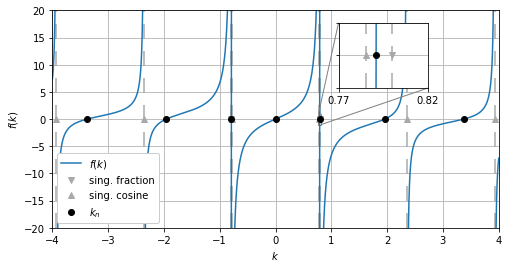

In [4]:
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# parameters
L = 1.25 # slip length
R = 1 # radius of the capillary
N = 10 # number of considered series coefficients
tol = 1e-8 # tolerance for the root finder
eps = 1e-8 # offset from singularity

figScale=1.2
defaultFigSize=plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [figScale*defaultFigSize[0], figScale*defaultFigSize[1]]

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 4)

ax1.set_xlabel('$k$')
ax1.set_ylabel('$f(k)$')
ax1.set_ylim([-20,20])
ax1.set_xlim([-4,4])
ax1.grid(b=None, which='major', axis='both')

# prepare data for characteristic equations, roots, and singularities
k=np.arange(-10,10,0.0001) 
n=np.arange(-10,10,1)
cosSingulars=np.pi*(2*n+1)/4.0
fracSingulars=np.array([R/L,-R/L])
singulars=np.concatenate((cosSingulars,fracSingulars))

# roots 
Phi=np.sort(np.concatenate((np.array([R/L]) , np.array(cosSingulars))))

# function without connecting line at singularies
coeffs = cf.StartupCoefficients_scaled()
Kn = coeffs.Kn(L/R, L/R, N, tol, eps)
Kns = np.sort( np.concatenate( (-1.0 * Kn, np.array([0.0]), Kn ) ) )
b = np.diff(coeffs._kFunc(k,L/R))
mask = np.where(np.abs(b) >= 20)[0]+1
kCondNoJump = np.ma.masked_equal(np.insert(coeffs._kFunc(k,L/R), mask, -1), -1)
k = np.ma.masked_equal(np.insert(k, mask, -1), -1)

# plot the inset
xlim = [0.77,0.82]
axins2 = inset_axes(ax1, width="20%", height="30%", bbox_to_anchor=(0.63,0.62,1.0,1.0), bbox_transform=ax1.transAxes, loc='lower left')
for r in singulars: 
    axins2.axvline(x=r,ls='--', dashes=[10, 8],color='darkgray')
axins2.plot(k, kCondNoJump, label='$f(k)$')
axins2.plot(fracSingulars, np.zeros(len(fracSingulars)),ls='', color='darkgray',marker='v',label='sing. fraction')
axins2.plot(cosSingulars, np.zeros(len(cosSingulars)), ls='',color='darkgray',marker='^',label='sing. cosine')
axins2.plot(Kns, np.zeros(len(Kns)),ls='', color='black',marker='o',label='$k_n$')
axins2.set_xlim(xlim)
axins2.set_ylim([-1.0,1.0])
axins2.grid()
axins2.axes.set_xticks(xlim)
axins2.axes.yaxis.set_ticklabels([])
mark_inset(ax1, axins2, loc1=2, loc2=4, fc="none", ec="0.5")

# plot the the rest of the figure
for r in singulars: 
    ax1.axvline(x=r,ls='--', dashes=[10, 8],color='darkgray')
ax1.plot(k, kCondNoJump, label='$f(k)$')
ax1.plot(fracSingulars, np.zeros(len(fracSingulars)),ls='', color='darkgray',marker='v',label='sing. fraction')
ax1.plot(cosSingulars, np.zeros(len(cosSingulars)), ls='',color='darkgray',marker='^',label='sing. cosine')
ax1.plot(Kns, np.zeros(len(Kns)),ls='', color='black',marker='o',label='$k_n$')

ax1.legend(loc='lower left',framealpha=1.0)

if saveFig:
    fig.savefig(os.path.join(figFolder,'fPlot_zoom.pdf'), bbox_inches='tight')
print("Done")